Membres du grgoupes:Amy DIAO
                    Louis Isacc Jean Samba DIOUF
                    Marie Marone M.L.M FAYE

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import math

## **1. Mise des données dans un format adapté**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/statistique-matserMSDA2020/projetStat/master/smp.csv', sep=';')

In [3]:
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,grav.cons,dep.cons,ago.cons,ptsd.cons,alc.cons,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,0.0,2.0,1,0,0,0,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN


### Structure du jeu de données

In [4]:
data.shape

(799, 26)

## **2. Changement des types de variable**

### Types des variables

In [5]:
data.dtypes

age             float64
prof             object
duree           float64
discip          float64
n.enfant        float64
n.fratrie         int64
ecole           float64
separation      float64
juge.enfant     float64
place           float64
abus            float64
grav.cons       float64
dep.cons          int64
ago.cons          int64
ptsd.cons         int64
alc.cons          int64
subst.cons        int64
scz.cons          int64
char            float64
rs              float64
ed              float64
dr              float64
suicide.s       float64
suicide.hr      float64
suicide.past    float64
dur.interv      float64
dtype: object

### Modification du type de variables

In [6]:
data.loc[:,'prof':'discip'] = data.loc[:,'prof':'discip'].astype('category')
data.loc[:,'ecole':'dr'] = data.loc[:,'ecole':'dr'].astype('category')
data.loc[:,'suicide.hr':'suicide.past'] = data.loc[:,'suicide.hr':'suicide.past'].astype('category')

In [7]:
data.dtypes

age              float64
prof            category
duree           category
discip          category
n.enfant         float64
n.fratrie          int64
ecole           category
separation      category
juge.enfant     category
place           category
abus            category
grav.cons       category
dep.cons        category
ago.cons        category
ptsd.cons       category
alc.cons        category
subst.cons      category
scz.cons        category
char            category
rs              category
ed              category
dr              category
suicide.s        float64
suicide.hr      category
suicide.past    category
dur.interv       float64
dtype: object

## **3. Calcul de la moyenne, la variance, et l’écart type pour chacune des variables suivantes: age, n.enfant, n.fratrie, dur.interv.**

In [8]:
description = data.loc[:,['age','n.enfant','n.fratrie','dur.interv']].describe()
description

,age,n.enfant,n.fratrie,dur.interv
count,797.000000,773.000000,799.000000,749.000000
mean,38.899624,1.755498,4.286608,61.891856
std,13.280978,1.834044,3.441485,19.669605
min,19.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,2.000000,48.000000
50%,37.000000,1.000000,3.000000,60.000000
75%,48.000000,3.000000,6.000000,75.000000
max,83.000000,13.000000,21.000000,120.000000


### MOYENNE

In [9]:
moyennes = description.loc['mean']
print(moyennes)

age           38.899624
n.enfant       1.755498
n.fratrie      4.286608
dur.interv    61.891856
Name: mean, dtype: float64


### VARIANCE

In [10]:
variances = description.loc['std']**2
print(variances)

age           176.384384
n.enfant        3.363716
n.fratrie      11.843818
dur.interv    386.893369
Name: std, dtype: float64


### ECART TYPE

In [11]:
sigma = description.loc['std']
print(sigma)

age           13.280978
n.enfant       1.834044
n.fratrie      3.441485
dur.interv    19.669605
Name: std, dtype: float64


### Donner les 3 premiers quantiles pour la variable age.

In [12]:
quartiles_age = description.loc[['25%','50%','75%'],'age']
quartiles_age

25%    28.0
50%    37.0
75%    48.0
Name: age, dtype: float64

## **4. Tracer le boxplot pour la variable age. Quelles conclusions en tirez-vous ?**

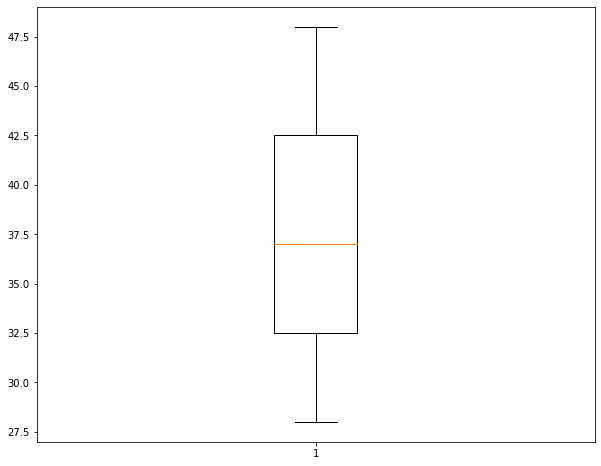

In [13]:
plt.figure(figsize=(10,8))
plt.boxplot(quartiles_age)
plt.show()

### **Conclusion** : La médiane est de 37 ans, 50% de la population a entre 32 et 42 ans

## **5. Afficher les données pour les agriculteurs qui ont plus de 2 enfants.**

In [14]:
agriculteur = data[(data['prof'] == 'agriculteur') & (data['n.enfant']>2)]
agriculteur

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,grav.cons,dep.cons,ago.cons,ptsd.cons,alc.cons,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
14,64.0,agriculteur,NaN,0.0,3.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,80.0
311,42.0,agriculteur,4.0,0.0,3.0,6,1.0,0.0,0.0,0.0,0.0,4.0,1,1,0,1,0,0,2.0,1.0,3.0,2.0,3.0,1.0,0.0,NaN
390,36.0,agriculteur,4.0,1.0,3.0,4,3.0,1.0,1.0,1.0,0.0,2.0,0,0,1,0,1,0,1.0,NaN,3.0,1.0,0.0,0.0,0.0,NaN
441,79.0,agriculteur,5.0,0.0,5.0,6,2.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,85.0


In [15]:
description_agri = agriculteur.loc[:,['age','n.enfant','n.fratrie','dur.interv']].describe()
description_agri

,age,n.enfant,n.fratrie,dur.interv
count,4.000000,4.0,4.000000,2.000000
mean,55.250000,3.5,4.500000,82.500000
std,19.889277,1.0,1.914854,3.535534
min,36.000000,3.0,2.000000,80.000000
25%,40.500000,3.0,3.500000,81.250000
50%,53.000000,3.0,5.000000,82.500000
75%,67.750000,3.5,6.000000,83.750000
max,79.000000,5.0,6.000000,85.000000


### MOYENNE POUR LES AGRICULTEURS

In [16]:
moyennes_agri = description_agri.loc['mean']
print(moyennes_agri)

age           55.25
n.enfant       3.50
n.fratrie      4.50
dur.interv    82.50
Name: mean, dtype: float64


### VARIANCE POUR LES AGRICULTEURS

In [17]:
variances_agri = description_agri.loc['std']**2
print(variances_agri)

age           395.583333
n.enfant        1.000000
n.fratrie       3.666667
dur.interv     12.500000
Name: std, dtype: float64


### ECART TYPE POUR LES AGRICULTEURS

In [18]:
sigma_agri = description_agri.loc['std']
print(sigma_agri)

age           19.889277
n.enfant       1.000000
n.fratrie      1.914854
dur.interv     3.535534
Name: std, dtype: float64


### Les 3 premiers quantiles pour la variable age pour les agriculteurs

In [19]:
quartiles_age_agri = description_agri.loc[['25%','50%','75%'],'age']
quartiles_age_agri

25%    40.50
50%    53.00
75%    67.75
Name: age, dtype: float64

### BOXPLOT POUR LES AGRIGULTEUR

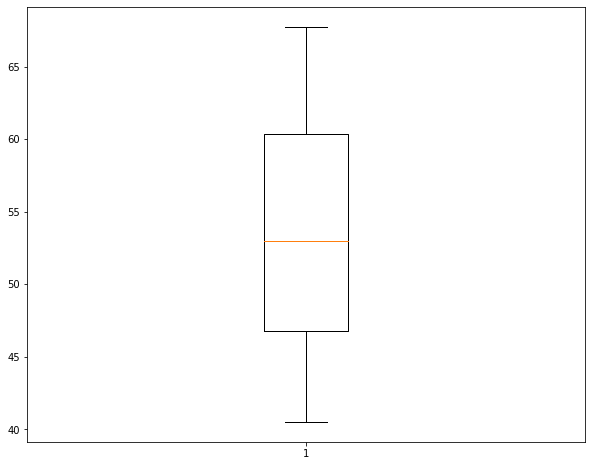

In [20]:
plt.figure(figsize=(10,8))
plt.boxplot(quartiles_age_agri)
plt.show()

### **Conclusion** : La médiane est de 53 ans, 50% de la population a entre 47 et 60 ans

## **6. Calculer les fréquences des modalités de la variable prof. Quelle est la catégorie modale ?**

In [21]:
profession = data['prof']
profession.head()

0                 autre
1                   NaN
2    prof.intermediaire
3               ouvrier
4           sans emploi
Name: prof, dtype: category
Categories (8, object): [agriculteur, artisan, autre, cadre, employe, ouvrier, prof.intermediaire,
                         sans emploi]

In [22]:
frequences = profession.value_counts() / profession.value_counts().sum()
frequences

ouvrier               0.286255
sans emploi           0.279950
employe               0.170240
artisan               0.113493
prof.intermediaire    0.073140
autre                 0.039092
cadre                 0.030265
agriculteur           0.007566
Name: prof, dtype: float64

### CATEGORIE MODALE

In [23]:
categorie_modale = profession.mode()[0]
print(categorie_modale)

ouvrier


## 7. Tracer le diagramme circulaire de la variable profession

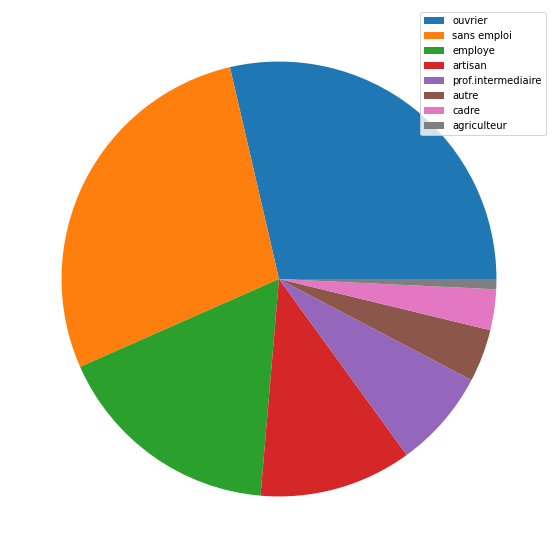

In [24]:
plt.figure(figsize=(10,10))
plt.pie(profession.value_counts())
plt.legend(list(frequences.index))
plt.show()

## **8. Donner les moyennes des âges par profession**

In [25]:
data.groupby('prof').mean()['age']

prof
agriculteur           48.833333
artisan               45.111111
autre                 34.935484
cadre                 50.083333
employe               38.711111
ouvrier               37.396476
prof.intermediaire    43.258621
sans emploi           35.896396
Name: age, dtype: float64

## **9. Donner la table des effectifs pour les variables prof incluant les ”NaN”.**

In [35]:
profession.value_counts(dropna=False)

ouvrier               227
sans emploi           222
employe               135
artisan                90
prof.intermediaire     58
autre                  31
cadre                  24
NaN                     6
agriculteur             6
Name: prof, dtype: int64

## **10. Donner le nombre de ”Nan” pour chaque variable.**

In [36]:
data.isna().sum()

age               2
prof              6
duree           223
discip            6
n.enfant         26
n.fratrie         0
ecole             5
separation       11
juge.enfant       5
place             7
abus              7
grav.cons         4
dep.cons          0
ago.cons          0
ptsd.cons         0
alc.cons          0
subst.cons        0
scz.cons          0
char             96
rs              103
ed              107
dr              111
suicide.s        41
suicide.hr       39
suicide.past     14
dur.interv       50
dtype: int64

## **11. Supprimer toutes les lignes contenant des ”Nan”.**

In [39]:
data.dropna(axis=0)

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,grav.cons,dep.cons,ago.cons,ptsd.cons,alc.cons,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
7,52.0,artisan,5.0,0.0,2.0,9,2.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,84.0
8,42.0,ouvrier,4.0,1.0,1.0,12,1.0,1.0,1.0,0.0,1.0,5.0,1,0,0,1,1,0,4.0,3.0,3.0,1.0,4.0,1.0,1.0,78.0
12,21.0,employe,4.0,0.0,0.0,3,2.0,1.0,1.0,1.0,0.0,3.0,0,0,0,1,1,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,95.0
13,40.0,artisan,4.0,0.0,3.0,5,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,90.0
16,60.0,prof.intermediaire,5.0,0.0,2.0,4,2.0,1.0,0.0,1.0,1.0,3.0,0,0,0,0,0,0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,27.0,prof.intermediaire,4.0,0.0,2.0,0,2.0,1.0,0.0,1.0,1.0,4.0,1,0,0,0,0,0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,60.0
795,44.0,ouvrier,4.0,1.0,1.0,12,2.0,0.0,0.0,0.0,0.0,5.0,1,0,1,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,105.0
796,31.0,cadre,4.0,0.0,3.0,6,4.0,1.0,1.0,1.0,0.0,3.0,1,0,0,0,1,0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,105.0
797,38.0,employe,5.0,0.0,0.0,1,3.0,0.0,0.0,0.0,0.0,7.0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,75.0


## **12. Tracer l’histogramme et la densité de la variable age sur la même figure.**

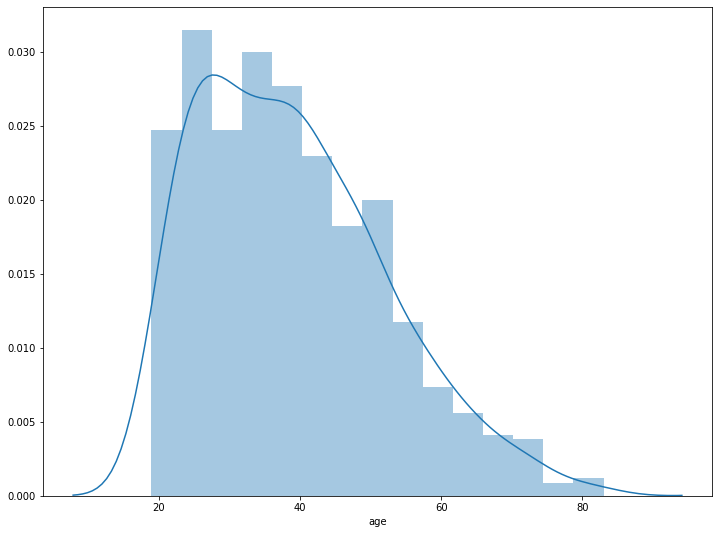

In [72]:
plt.figure(figsize=(12,9))
sns.distplot(data.age)
plt.show()

## **13. Discrétisez la variable age**

In [87]:
Q1 = data.age.describe()['25%']
Q2 = data.age.describe()['50%']
Q3 = data.age.describe()['75%']

In [81]:
min_age = data.age.min()
max_age = data.age.max()

In [187]:
new_age = np.array(data.age)

In [188]:
#new_age[new_age>=min_age and new_age<=Q1] = '['+str(min_age)+','+str(Q1)+']'
new_age[(new_age >= min_age) & (new_age <= Q1)] = 1
new_age[(new_age > Q1) & (new_age <= Q2)] = 2
new_age[(new_age > Q2) & (new_age <= Q3)] = 3
new_age[(new_age > Q3) & (new_age <= max_age)] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-pac

In [189]:
new_age = list(new_age)

In [190]:
for x in range(len(new_age)):
  if math.isnan(new_age[x]) == False:
    new_age[x] = str(new_age[x])
    if (new_age[x] == '1.0'):
      new_age[x] = '['+str(min_age)+','+str(Q1)+']'
    elif (new_age[x] == '2.0'):
      new_age[x] = ']'+str(Q1)+','+str(Q2)+']'
    elif (new_age[x] == '3.0'):
      new_age[x] = ']'+str(Q2)+','+str(Q3)+']'
    elif (new_age[x] == '4.0'):
      new_age[x] = ']'+str(Q3)+','+str(max_age)+']'


In [192]:
data['age_classe'] = new_age

In [193]:
data.head()

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,abus,grav.cons,dep.cons,ago.cons,ptsd.cons,alc.cons,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv,age_classe
0,31.0,autre,4.0,0.0,2.0,4,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,"]28.0,37.0]"
1,49.0,NaN,NaN,0.0,7.0,3,2.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,70.0,"]48.0,83.0]"
2,50.0,prof.intermediaire,5.0,0.0,2.0,2,2.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,1.0,2.0,3.0,2.0,0.0,0.0,0.0,NaN,"]48.0,83.0]"
3,47.0,ouvrier,NaN,0.0,0.0,6,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,105.0,"]37.0,48.0]"
4,23.0,sans emploi,4.0,1.0,1.0,6,1.0,1.0,NaN,1.0,0.0,2.0,1,0,0,0,0,0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,NaN,"[19.0,28.0]"


## **14. Donner les fréquences des modalités de la nouvelle variable age_classe.**

In [196]:
# Effectifs
effectifs = data.age_classe.value_counts()
print(effectifs)

[19.0,28.0]    212
]37.0,48.0]    209
]28.0,37.0]    190
]48.0,83.0]    186
Name: age_classe, dtype: int64


In [198]:
# Effectifs
data.age_classe.value_counts() / effectifs.sum()

[19.0,28.0]    0.265997
]37.0,48.0]    0.262233
]28.0,37.0]    0.238394
]48.0,83.0]    0.233375
Name: age_classe, dtype: float64